In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Single feature data - solar flux for 30 days

In [183]:
rawdata=pd.read_csv("solar-data-july-2015.txt",sep="\t",skiprows=15)
Y=np.flip(np.array(rawdata["Flux"]))
n=len(Y)
X=np.array(list(range(n)))
x=X.reshape(-1,1)
y=Y.reshape(-1,1)

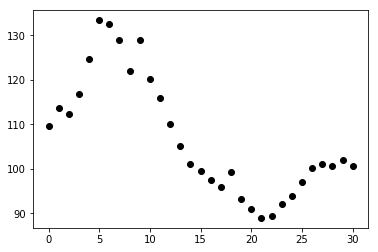

In [184]:
plt.scatter(x,y,c="k")

In [185]:
from sklearn.tree import DecisionTreeRegressor

In [186]:
regr3= DecisionTreeRegressor(max_depth=3)
regr2= DecisionTreeRegressor(max_depth=2)
regr4=DecisionTreeRegressor(max_depth=4)
regr5=DecisionTreeRegressor(max_depth=5)
regr6=DecisionTreeRegressor(max_depth=6)

regr3.fit(x,y)
regr2.fit(x,y)
regr4.fit(x,y)
regr5.fit(x,y)
regr6.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [187]:
ypred3=regr3.predict(x)
ypred2=regr2.predict(x)
ypred4=regr4.predict(x)
ypred5=regr5.predict(x)
ypred6=regr6.predict(x)

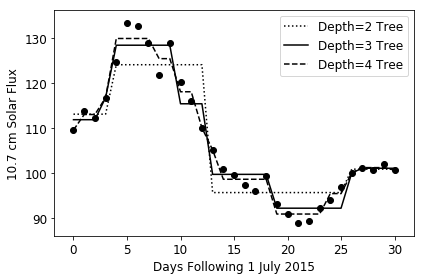

In [188]:
plt.plot(x,ypred2,c="k",ls=":", label="Depth=2 Tree")

plt.plot(x,ypred3,c="k",label="Depth=3 Tree")
plt.plot(x,ypred4,c="k",ls="--",label="Depth=4 Tree")
plt.scatter(x,y,c="k")
plt.legend(fontsize=12)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)

plt.ylabel("10.7 cm Solar Flux", fontsize=12)
plt.xlabel("Days Following 1 July 2015", fontsize=12)
fig=plt.gcf()
fig.tight_layout()
#fig.savefig("regression-tree-solar-flux-july-2015.pdf")

In [189]:
MSE2=sum((Y-ypred2)**2)/n
MSE3=sum((Y-ypred3)**2)/n
MSE4=sum((Y-ypred4)**2)/n
MSE5=sum((Y-ypred5)**2)/n
MSE6=sum((Y-ypred6)**2)/n


print("The MSE for a depth of 2 is ", round(MSE2,2))
print("The MSE for a depth of 3 is ", round(MSE3,2))
print("The MSE for a depth of 4 is ", round(MSE4,2))
print("The MSE for a depth of 5 is ", round(MSE5,2))
print("The MSE for a depth of 6 is ", round(MSE6,2))

The MSE for a depth of 2 is  25.71
The MSE for a depth of 3 is  8.32
The MSE for a depth of 4 is  3.73
The MSE for a depth of 5 is  0.81
The MSE for a depth of 6 is  0.11


In [190]:
for j in range(2,8):
    r=DecisionTreeRegressor(max_depth=j)
    r.fit(x,y)
    p=r.predict(x)
    MSE=sum((Y-p)**2)/n
    print("The MSE for a depth of ",j," is ", round(MSE,2))


The MSE for a depth of  2  is  25.71
The MSE for a depth of  3  is  8.32
The MSE for a depth of  4  is  3.73
The MSE for a depth of  5  is  0.81
The MSE for a depth of  6  is  0.11
The MSE for a depth of  7  is  0.0


In [231]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)

In [232]:
data[:5]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [233]:
#X=np.array(data[["cyl","displ","hp","weight", "accel"]])
X=np.array(data[["displ","hp"]])
Y=np.array(data["mpg"])
n=len(Y)
print(n)

392


In [234]:
y=Y.reshape(-1,1)

In [235]:
r=DecisionTreeRegressor(max_depth=3)

In [236]:
r.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [237]:
p=r.predict(X)


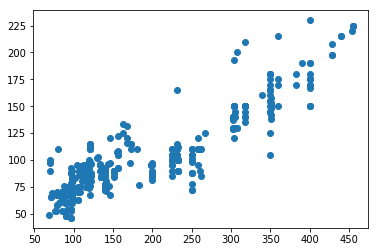

In [238]:
HP=X[:,0]; DISP=X[:,1]
plt.scatter(HP,DISP)

In [239]:
values=list(set(p))
nval=len(values)
print(nval,"distinct values among ", len(p)," inputs")

8 distinct values among  392  inputs


In [240]:
def cluster_center(value, X, Y, Z):
    x,y=np.array([[x,y] for (x,y,z) in zip (X,Y,Z) if z==value]).T
    x=np.mean(x)
    y=np.mean(y)
    return (x,y)
HP=X[:,0]; DISP=X[:,1]
cluster_centers = [cluster_center(u, HP, DISP, p) for u in values]

In [241]:
print(" Displ    HP    MPG")
for (hp,disp),mpg in zip(cluster_centers, values):
    print("%6.2f %6.2f %5.2f" %(hp,disp,mpg))

 Displ    HP    MPG
 84.93  62.69 34.80
380.57 186.93 13.41
325.55 144.61 15.31
232.44  98.26 19.06
299.17 111.67 23.72
129.33  97.23 24.66
114.54  77.25 28.95
101.81  63.88 31.71


Decision surface code example is given at https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py

In [248]:
# MSE is based on entire data set, we did not do a train/test split
# so interpret it carefully
print("MSE=",round(sum((Y-p)**2)/n,2))

MSE= 13.61


In [219]:
xmin, xmax = HP.min() - 1, HP.max() + 1
ymin, ymax = DISP.min() - 1, DISP.max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 1),
                         np.arange(ymin, ymax, 1))

In [220]:
ZP=r.predict(np.c_[xx.ravel(), yy.ravel()])

Z=ZP.reshape(xx.shape)


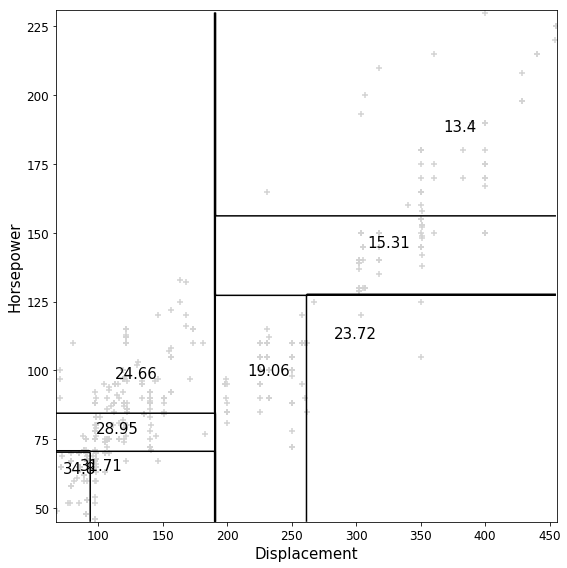

In [222]:
cs = plt.contour(xx, yy, Z, colors="k")#,  cmap=plt.cm.RdYlBu)

plt.xlabel("Displacement",fontsize=15)
plt.ylabel("Horsepower",fontsize=15)

for value, location in zip (values, cluster_centers):
    plt.text(*location, str(round(value,2)), fontsize=15, 
             horizontalalignment="center")

plt.scatter(HP,DISP,marker="+",c="lightgray")
plt.xlim(xmin,xmax);
plt.ylim(ymin,ymax)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)

fig=plt.gcf()
fig.set_size_inches(8,8)
fig.tight_layout()
fig.savefig("Regression-Tree-Surface-Plot-MPG.pdf")

# higher dimensions


In [249]:
X=np.array(data[["cyl","displ","hp","weight", "accel"]])
#X=np.array(data[["displ","hp"]])
Y=np.array(data["mpg"])
n=len(Y)
print(n)

392


In [250]:
y=Y.reshape(-1,1)
r=DecisionTreeRegressor(max_depth=3)
r.fit(X,y)
p=r.predict(X)

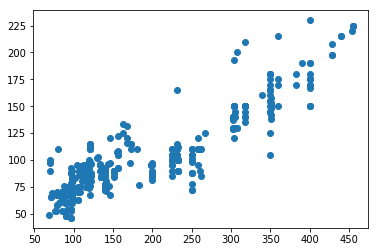

In [251]:
HP=X[:,1]; DISP=X[:,2]
plt.scatter(HP,DISP)

In [252]:
print("MSE=",round(sum((Y-p)**2)/n,2))

MSE= 13.38


In [226]:
values=list(set(p))
nval=len(values)
print(nval,"distinct values among ", len(p)," inputs")

8 distinct values among  392  inputs


In [227]:
cluster_centers = [cluster_center(u, HP, DISP, p) for u in values]

In [228]:
print(" Displ    HP    MPG")
for (hp,disp),mpg in zip(cluster_centers, values):
    print("%6.2f %6.2f %5.2f" %(hp,disp,mpg))

 Displ    HP    MPG
 91.04  63.51 33.38
 93.50  50.00 43.70
373.55 176.68 12.85
336.52 155.35 15.31
232.44  98.26 19.06
299.17 111.67 23.72
129.33  97.23 24.66
114.54  77.25 28.95
